https://github.com/jjfPCSI1/py4phys/tree/master/lib

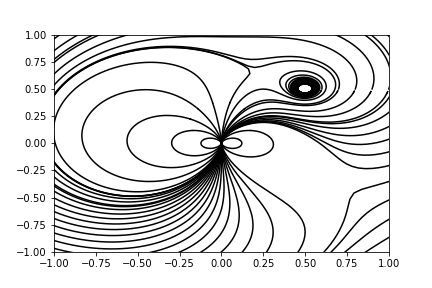

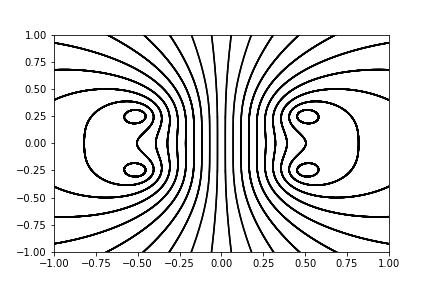

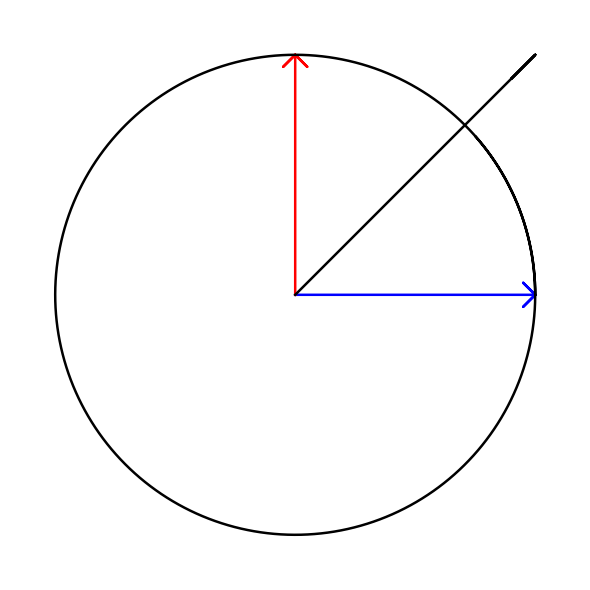

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

##############################
###    True pour sauver    ###
###      False sinon       ###
##############################
save=True


w=1
fleche_x=np.array([0,1,0.95,1,0.95,1])
fleche_y=np.array([0,0,0.05,0,-0.05,0])
fleche=np.zeros((2,len(fleche_x)))
fleche[0,:]=fleche_x
fleche[1,:]=fleche_y
#fleche[:,i]=les coordonnées du point i en colonne

N=1000

#test et initialisation
t=0#np.linspace(0,10,N)
theta=w*t#rotation 
fleche_rot_x=(fleche_x*np.cos(theta)-fleche_y*np.sin(theta))
fleche_rot_y=(fleche_x*np.sin(theta)+fleche_y*np.cos(theta))


#on sauve tous les calculs dans un tableau pour que l'animation soit plus rapide
#juste un accès mémoire et pas de calcul, pas de boucle
Fleche_x,osef=np.meshgrid(fleche_rot_x,np.ones(N))
Fleche_y,osef=np.meshgrid(fleche_rot_y,np.ones(N))
t=np.linspace(0,6*np.pi/w,N)
osef,coswt=np.meshgrid(np.ones(len(fleche_x)),np.cos(w*t))
osef,sinwt=np.meshgrid(np.ones(len(fleche_x)),np.sin(w*t))

DataB1x = Fleche_x*coswt
DataB1y = Fleche_y*coswt
DataB2x = Fleche_y*sinwt
DataB2y = Fleche_x*sinwt
#fleche_rot_x=0.35*(fleche_x*np.cos(theta)-fleche_y*np.sin(theta))
#fleche_rot_y=0.35*(fleche_x*np.sin(theta)+fleche_y*np.cos(theta))
DataBx = Fleche_x*coswt-Fleche_y*sinwt
DataBy =  Fleche_x*sinwt+Fleche_y*coswt

wid=2.5
fig = plt.figure(facecolor='w',figsize=[8,8])
B1, = plt.plot(fleche_x,fleche_y,'-b',linewidth=wid)
B2, = plt.plot(fleche_y,fleche_x,'-r',linewidth=wid)
B,  = plt.plot(fleche_x+fleche_y,fleche_x+fleche_y,'-k',linewidth=wid)
pointille1, = plt.plot(fleche_x[1],[0],'--b',linewidth=wid)
pointille2, = plt.plot(fleche_x[1],[0],'--r',linewidth=wid)
plt.plot(np.cos(np.linspace(0,7,1000)),np.sin(np.linspace(0,7,1000)),'-k',linewidth=wid)

plt.axis('off')
plt.axis('equal')
plt.axis([-1.2,1.2,-1.2,1.2])
fig.gca().set_position([0,0,1,1])




def init():
    B.set_xdata([])
    B.set_ydata([])
    B1.set_xdata([])
    B1.set_ydata([])
    B2.set_xdata([])
    B2.set_ydata([])
    pointille1.set_xdata([])
    pointille1.set_ydata([])
    pointille2.set_xdata([])
    pointille2.set_ydata([])
    return (B,B1,B2,pointille1,pointille2)
    
def animate(i):
    i=i%N
    B.set_xdata(DataBx[i,:])
    B.set_ydata(DataBy[i,:])
    B1.set_xdata(DataB1x[i,:])
    B1.set_ydata(DataB1y[i,:])
    B2.set_xdata(DataB2x[i,:])
    B2.set_ydata(DataB2y[i,:])
    pointille1.set_xdata([DataB1x[i,1], DataB1x[i,1] ])
    pointille1.set_ydata([0,DataB2y[i,1]])
    pointille2.set_xdata([0,DataB1x[i,1]])
    pointille2.set_ydata([DataB2y[i,1],DataB2y[i,1]])
    return (B,B1,B2,pointille1,pointille2)    

#anim = animation.FuncAnimation(fig,animate,2000,interval=20,init_func=init,blit=False);

In [2]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="PNG/I2_champ_tournant_diphase.mp4" type="video/mp4">
</video></div>